In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from datetime import datetime

os.getcwd()

'c:\\Users\\juani\\Desktop\\TFG Medium\\TFG Advanced\\7. Data Preparation'

In [2]:
# Información básica de todos los tickers
basic_data = pd.read_csv("Basic_information_repaired.csv")

In [3]:
basic_data

,Name,Currency,Sector,Industry,Country,IPO,Insider Percentage,Institution Percentage,Years since IPO,Ticker
0,"AGILENT TECHNOLOGIES, INC.",USD,Healthcare,Diagnostics & Research,US,1999-11-18,0.0024,0.9126,23,A
1,ALCOA CORPORATION,USD,Basic Materials,Aluminum,US,2016-10-18,0.0087,0.8436,6,AA
2,ATA CREATIVITY GLOBAL,USD,Consumer Defensive,Education & Training Services,CN,2008-01-29,0.0553,0.1709,14,AACG
3,AMERICAN AIRLINES GROUP INC.,USD,Industrials,Airlines,US,2013-12-09,0.0108,0.5432,9,AAL
4,"APPLIED OPTOELECTRONICS, INC.",USD,Technology,Semiconductors,US,2013-09-26,0.0712,0.5119,9,AAOI
...,...,...,...,...,...,...,...,...,...,...
3303,"ZUORA, INC.",USD,Technology,Software—Infrastructure,US,2018-04-12,0.0089,0.7699,4,ZUO
3304,ZURN WATER SOLUTIONS CORPORATION,USD,Utilities,Utilities—Regulated Water,US,2012-03-29,0.0243,1.0406,10,ZWS
3305,ZYMEWORKS INC.,USD,Healthcare,Biotechnology,CA,2017-04-28,0.0069,0.7926,5,ZYME
3306,"ZYNEX, INC.",USD,Healthcare,Medical Distribution,US,2002-11-27,0.4180,0.3193,20,ZYXI


# Comprobaciones sobre los datos

## Funciones

In [4]:
# Devuelve la capitalización de mercado de un ticker
def get_market_cap(ticker):
    # Abrimos los fundamentales con el precio
    fundamental_data = pd.read_csv("CleanedFundamentals\\"+ticker+".csv", index_col=0)

    market_cap = fundamental_data.loc[fundamental_data.index[-1],"Adj Close"] * fundamental_data.loc[fundamental_data.index[-1], "Weighted Average Shares Outstanding"]

    return market_cap

In [5]:
# Lista de los campos a los que se le ha aplicado el fix trivial
trivial_fix_list = list({"Other Liabilities", "Preferred Stock", "Common Stock", "Tax Assets", "Tax Payable", "Capital Lease Obligations", "Common Stock Repurchased", "Common Stock Issued",
                    "Dividends Paid", "Interest Income", "Other Expenses", "Stock Based Compensation", "Deferred Income Tax",
                    "Interest Expense (Gain)", "Other Investing Activities", "Deferred Tax Liabilities", "Purchases of Investments", "Sales/Maturities of Investments","Investments",
                    "Other Assets", "Acquisitions Net", "Inventory", "Inventory (Cash Flow)", "Short-Term Debt", "Debt Repayment", "Long-Term Debt", "Research and Development Exp.", "Effect of Forex Changes on Cash", "Other Liabilities"
                    , "Other Working Capital", "Short-Term Investments", "Dividend Cum", "Dividend", "Other Non-Current Liabilities", "Accounts Payable (Cash Flow)",
                    "Accounts Receivable",'Intangible Assets', 'Goodwill'})

In [6]:
# Lista de los campos a los que se le ha aplicado el fix normal
normal_fix_list = list({"Revenue", "COGS","Adj Close", "Price with cum Dividends" "Gross Profit", "Accounts Payable (Balance)", "Gross Profit Ratio","Goodwill and Intangible Assets", "PP&E", "Net Income (Cash Flow)", "Other Assets", "Selling and Marketing Exp.", "Acquisitions Net", "Minority Interest",
                 "Deferred Tax Liabilities", "Investments", "Short-Term Investments", "Deferred Revenue (Current)", "Deferred Revenue (Non-Current)", "Research and Development Exp.", "Effect of Forex Changes on Cash",
                 "Sales/Maturities of Investments", "Purchases of Investments", "Goodwill", "Inventory", "Intangible Assets", "Debt Repayment", "Short-Term Debt",
                 "Long-Term Debt", "Other Non-Current Liabilities","Depreciation and Amortization (Cash Flow)", "Cash Used/Provided by Financing Activities", "Other Comprehensive Income/Loss",
                 "Net Receivables", "General and Administrative Exp.", "Total Non-Current Liabilities", "Selling, General and Administrative Exp.", "CAPEX",
                 "Total Other Income Expenses (Gains)","COGS and Expenses", "Income Tax expense (Gain)", "Other Non-Current Assets", "Other Current Assets", "Other Current Liabilities",
                 "Total Non-Current Assets","EBITDA", "Depreciation and Amortization", "Other Financing Activites", "Other Total Stockholders Equity", "Operating Income", "Operating Income Ratio", "Cash at the End of Period",
                 "Retained Earnings", "Cash Used for Investing Activites","Operating Expenses","Total Current Liabilities", "Total Current Assets","Cash at the Beginning of Period",
                 "Net Change In Cash","Income Before Tax","Income Before Tax Ratio","Cash and Short-Term Investments", "Other Non-Cash Items", "Cash and Cash Equivalents",
                 "Cash Provided by Operating Activities", "Total Stockholders Equity", "Total Assets", "Total Liabilities", "Total Liabilities And Stockholders Equity","Free Cash Flow",
                 "Total Liabilities & Equity", "EPS", "EPS Diluted", "EBITDA Ratio", "Net Income Ratio", "Net Income", "Weighted Average Shares Outstanding", "Weighted Average Shares Outstanding Diluted","Change in Working Capital"})

In [7]:
# Abrimos los fundamentales de cualquier acción para tener las columnas que necesitamos
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\FB.csv", index_col=0)

fixed_columns_set = (set(trivial_fix_list) | set(normal_fix_list))
not_fixed_set = set(fundamental_data.columns) - fixed_columns_set

In [8]:
fundamental_data

,Revenue,COGS,Gross Profit,Gross Profit Ratio,Research and Development Exp.,"Selling, General and Administrative Exp.",Other Expenses,Operating Expenses,COGS and Expenses,Interest Income,...,Cash at the End of Period,Cash at the Beginning of Period,Free Cash Flow,Open,Close,Adj Close,Volume,Dividend,Dividend Cum,Price with cum Dividends
2012,5089000000,1364000000,3725000000,0.7320,1399000000,1788000000,0.0,3187000000,4551000000,14000000.0,...,2384000000,1512000000,377000000,22.080,21.710,21.710,1.100938e+09,0,0,21.710
2013,7872000000,1875000000,5997000000,0.7618,1415000000,1778000000,0.0,3193000000,5068000000,19000000.0,...,3323000000,2384000000,2860000000,29.430,33.890,33.890,1.351153e+09,0,0,33.890
2014,12466000000,2153000000,10313000000,0.8273,2666000000,2653000000,0.0,5319000000,7472000000,27000000.0,...,4315000000,3323000000,3626000000,67.270,70.555,70.555,1.056004e+09,0,0,70.555
2015,17928000000,2867000000,15061000000,0.8401,4816000000,4020000000,0.0,8836000000,11703000000,52000000.0,...,4907000000,4315000000,6076000000,84.635,87.600,87.600,5.467218e+08,0,0,87.600
2016,27638000000,3789000000,23849000000,0.8629,5919000000,5503000000,0.0,11422000000,15211000000,176000000.0,...,8903000000,4907000000,11617000000,118.105,118.000,118.000,4.653264e+08,0,0,118.000
2017,40653000000,5454000000,35199000000,0.8658,7754000000,7242000000,0.0,14996000000,20450000000,398000000.0,...,8079000000,8903000000,17483000000,151.745,160.355,160.355,3.465486e+08,0,0,160.355
2018,55838000000,9355000000,46483000000,0.8325,10273000000,11297000000,0.0,21570000000,30925000000,661000000.0,...,10124000000,8204000000,15359000000,173.715,172.290,172.290,5.334922e+08,0,0,172.290
2019,70697000000,12770000000,57927000000,0.8194,13600000000,20341000000,0.0,33941000000,46711000000,924000000.0,...,19279000000,10124000000,21212000000,181.575,188.660,188.660,3.142252e+08,0,0,188.660
2020,85965000000,16692000000,69273000000,0.8058,18447000000,18155000000,0.0,36602000000,53294000000,672000000.0,...,17954000000,19279000000,23632000000,226.545,240.370,240.370,5.042959e+08,0,0,240.370
2021,117929000000,22649000000,95280000000,0.8079,24655000000,23872000000,0.0,48527000000,71176000000,461000000.0,...,16865000000,17954000000,39116000000,328.160,326.905,326.905,3.873407e+08,0,0,326.905


In [9]:
not_fixed_set

{'Close',
 'Gross Profit',
 'Inventory (Balance)',
 'Open',
 'Price with cum Dividends',
 'Volume'}

In [10]:
core_columns = ["Revenue", "Gross Profit", "Operating Income","Income Tax expense (Gain)", "Net Income", "Total Assets", "Total Liabilities", "Total Stockholders Equity"]

In [11]:
def get_missing_percentage_by_column(df):
    missing_percentage_by_column = {}
    for col in df.columns:
        missing_percentage_by_column[col] = df[col].isnull().sum() / df.shape[0]
    missing_percentage_by_column_df = pd.DataFrame.from_dict(missing_percentage_by_column, orient='index')
    return missing_percentage_by_column_df

In [12]:
def get_missing_number_by_column(df):
    missing_number_by_column = {}
    for col in df.columns:
        missing_number_by_column[col] = df[col].isnull().sum()
    missing_number_by_column_df = pd.DataFrame.from_dict(missing_number_by_column, orient='index')
    return missing_number_by_column_df

In [13]:
def get_missing_percentage(ticker, onlyCore=False, reconstruct=False, trivial_fix = False):
    # Devuelve la cantidad de datos faltantes de cada ticker en porcentaje

    if not reconstruct:
        fundamental_data = pd.read_csv("CleanedFundamentals\\"+ticker+".csv", index_col=0)
    elif reconstruct and not trivial_fix:
        try:
            fundamental_data = pd.read_csv("CleanedFundamentalsNormalFix\\"+ticker+".csv", index_col=0)
        except:
            return np.nan
    elif reconstruct and trivial_fix:
        fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)

    # Comprobamos solo los elementos importantes
    if onlyCore:
        fundamental_data = fundamental_data[core_columns]

    # Calculamos el porcentaje de nulos sobre el total
    total = fundamental_data.isnull().sum().sort_values(ascending=False)
    total_cells = np.product(fundamental_data.shape)
    total_missing = total.sum()
    percent_missing = (total_missing/total_cells)

    return percent_missing

## Comprobando la calidad de los datos

Queremos comparar la calidad de los datos según si:
- No se han reparado
- Se han reparado sin fix trivial
- Se han reparado con fix trivial

Teniendo en cuenta:
- El dataframe entero
- Solo los fundamentales imporantes

Y comprobar el porcentaje de errores:
- Por columnas
- Por filas
- En el dataframe general

### Porcentaje de errores en el dataframe general

In [14]:
# Datos sin reparar: Todos
basic_data["NR - Percentage Missing"] = basic_data["Ticker"].apply(lambda x: get_missing_percentage(x))
# Datos sin reparar: Solo fundamentales importantes
basic_data["NR - Percentage Missing (Only Core)"] = basic_data["Ticker"].apply(lambda x: get_missing_percentage(x, onlyCore=True))

In [15]:
# Datos reparados (Sin fix trivial): Todos
basic_data["R - Percentage Missing"] = basic_data["Ticker"].apply(lambda x: get_missing_percentage(x, onlyCore=False, reconstruct=True))
# Datos reparados (Sin fix trivial): Solo fundamentales importantes
basic_data["R - Percentage Missing (Only Core)"] = basic_data["Ticker"].apply(lambda x: get_missing_percentage(x, onlyCore=True, reconstruct=True))

In [16]:
# Datos reparados (Con fix trivial): Todos
basic_data["R - Percentage Missing (Trivial Fix)"] = basic_data["Ticker"].apply(lambda x: get_missing_percentage(x, onlyCore=False, reconstruct=True, trivial_fix= True))
# Datos reparados (Con fix trivial): Solo fundamentales importantes
basic_data["R - Percentage Missing (Only Core) (Trivial Fix)"] = basic_data["Ticker"].apply(lambda x: get_missing_percentage(x, onlyCore=True, reconstruct=True, trivial_fix= True))

In [17]:
# ¿Ayuda la recconstrucción a los datos core?
basic_data[basic_data["NR - Percentage Missing (Only Core)"] < basic_data["R - Percentage Missing (Only Core) (Trivial Fix)"]][["Ticker","NR - Percentage Missing (Only Core)", "R - Percentage Missing (Only Core) (Trivial Fix)"]]

,Ticker,NR - Percentage Missing (Only Core),R - Percentage Missing (Only Core) (Trivial Fix)


In [18]:
basic_data[basic_data["R - Percentage Missing (Only Core)"] > 0].sort_values(by=["R - Percentage Missing (Only Core) (Trivial Fix)"], ascending=False)

,Name,Currency,Sector,Industry,Country,IPO,Insider Percentage,Institution Percentage,Years since IPO,Ticker,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix)


In [19]:
basic_data[["NR - Percentage Missing", "R - Percentage Missing", "R - Percentage Missing (Trivial Fix)"]].describe().round(2)

,NR - Percentage Missing,R - Percentage Missing,R - Percentage Missing (Trivial Fix)
count,3308.00,3239.00,3308.00
mean,0.23,0.15,0.01
std,0.07,0.04,0.01
min,0.06,0.05,0.00
25%,0.19,0.12,0.00
50%,0.23,0.15,0.00
75%,0.27,0.18,0.01
max,0.57,0.47,0.14


Text(0.5, 0, 'Percentage of missing values')

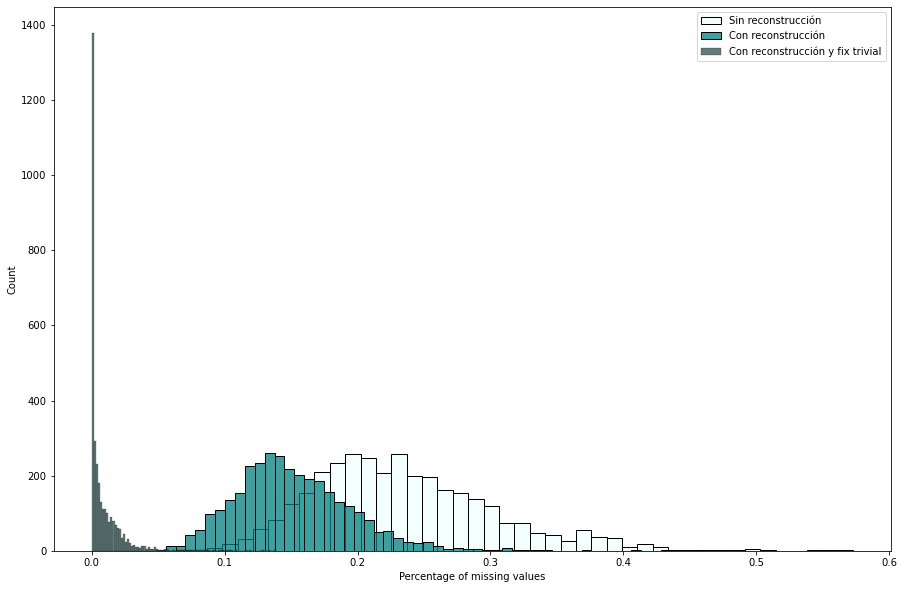

In [20]:
# change plot size
plt.rcParams['figure.figsize'] = [15, 10]


sns.histplot(data=basic_data, x="NR - Percentage Missing", color="azure",)
sns.histplot(data=basic_data, x="R - Percentage Missing", color="teal")
sns.histplot(data=basic_data, x="R - Percentage Missing (Trivial Fix)", color="darkslategray")
plt.legend(["Sin reconstrucción", "Con reconstrucción", "Con reconstrucción y fix trivial"])
plt.xlabel('Percentage of missing values')

### Porcentaje de errores por columnas

In [21]:
# Por columnas
def getMissingPercentageByColumn(basic_data, reconstruct=False, trivial_fix = False):
    ticker = "FB"
    if not reconstruct:
            fundamental_data = pd.read_csv("CleanedFundamentals\\"+ticker+".csv", index_col=0)
    elif reconstruct and not trivial_fix:
        try:
            fundamental_data = pd.read_csv("CleanedFundamentalsNormalFix\\"+ticker+".csv", index_col=0)
        except:
            pass
    elif reconstruct and trivial_fix:
        fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)

    missing_number_by_column_df = pd.DataFrame(0,index=fundamental_data.columns, columns=["Number of total values", "Number of missing values"])
    

    for index, row in basic_data.iterrows():
        ticker = row["Ticker"]

        if not reconstruct:
            fundamental_data = pd.read_csv("CleanedFundamentals\\"+ticker+".csv", index_col=0)
        elif reconstruct and not trivial_fix:
            try:
                fundamental_data = pd.read_csv("CleanedFundamentalsNormalFix\\"+ticker+".csv", index_col=0)
            except:
                continue
        elif reconstruct and trivial_fix:
            fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)

        for index, row in missing_number_by_column_df.iterrows():
            missing_number_by_column_df.loc[index, "Number of total values"] +=  len(fundamental_data[index])
            missing_number_by_column_df.loc[index, "Number of missing values"] += fundamental_data[index].isnull().sum()


        
    missing_number_by_column_df["Percentage of missing values"] = missing_number_by_column_df["Number of missing values"]/missing_number_by_column_df["Number of total values"]

    return missing_number_by_column_df


In [22]:
# Sin reconstruir
missing_percentage_by_column_df = getMissingPercentageByColumn(basic_data)

# Con reconstrucción (sin fix trivial)
missing_percentage_by_column_reconstructed_df = getMissingPercentageByColumn(basic_data, reconstruct = True)

# Con reconstrucción (con fix trivial)
missing_percentage_by_column_reconstructed_trivial_df = getMissingPercentageByColumn(basic_data, reconstruct = True, trivial_fix = True)



### Todas las columnas

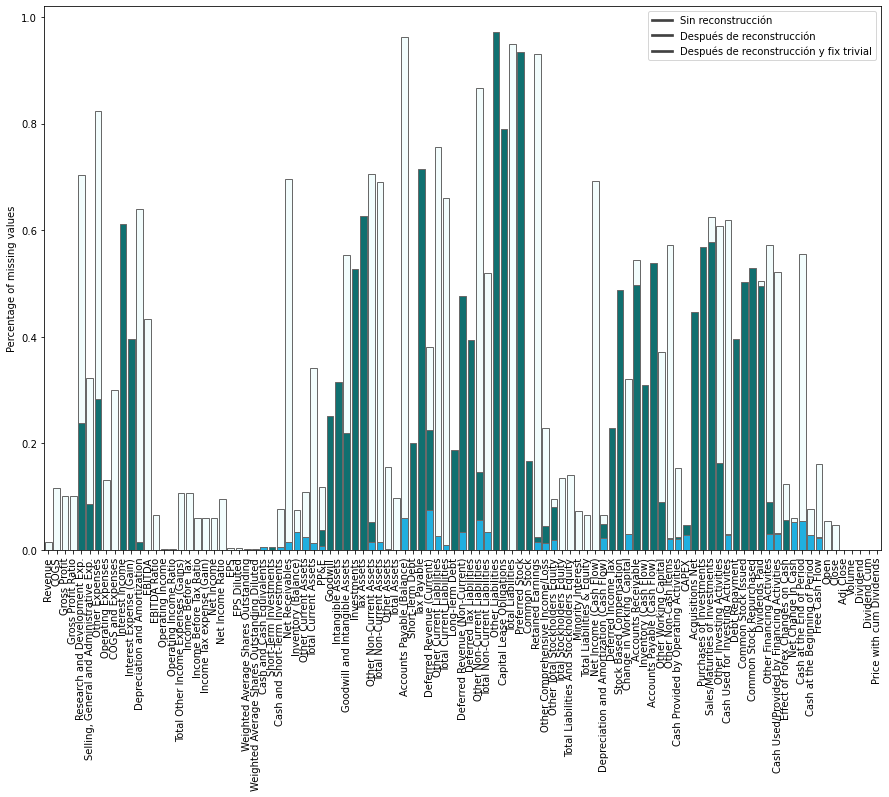

In [23]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.xticks(rotation=90)

# Color Azure (casi blanco): Datos reconstruidor sin fix trivial
sns.barplot(data=missing_percentage_by_column_df, x=missing_percentage_by_column_df.index, y="Percentage of missing values", color="azure", edgecolor = "dimgray")
# Color Teal (más verdoso): Datos reconstruidor con fix trivial
sns.barplot(data=missing_percentage_by_column_reconstructed_df, x=missing_percentage_by_column_reconstructed_df.index, y="Percentage of missing values", color="teal", edgecolor = "dimgray")
# Color Deepskyblue (azul claro): Datos después de reconstruir
sns.barplot(data=missing_percentage_by_column_reconstructed_trivial_df, x=missing_percentage_by_column_reconstructed_trivial_df.index, y="Percentage of missing values", color="deepskyblue", edgecolor = "dimgray")
plt.legend(["Sin reconstrucción", "Después de reconstrucción", "Después de reconstrucción y fix trivial"])

C:\Users\juani\AppData\Local\Temp/ipykernel_22148/3872068543.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_percentage_by_column_df = missing_percentage_by_column_df.sort_values(by="Percentage of missing values", ascending=False)[missing_percentage_by_column_df["Percentage of missing values"] > 0]


<AxesSubplot:xlabel='Percentage of missing values'>

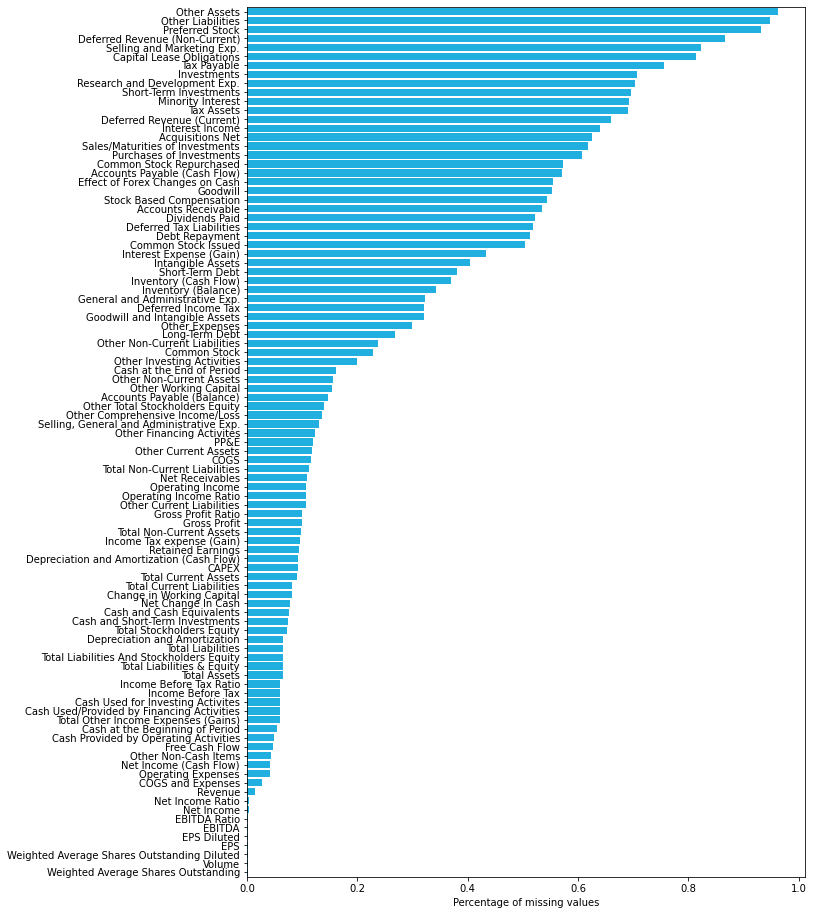

In [24]:
plt.rcParams['figure.figsize'] = [10, 16]

missing_percentage_by_column_df = missing_percentage_by_column_df.sort_values(by="Percentage of missing values", ascending=False)[missing_percentage_by_column_df["Percentage of missing values"] > 0]

sns.barplot(data=missing_percentage_by_column_df, x="Percentage of missing values", y=missing_percentage_by_column_df.index, color="deepskyblue")

C:\Users\juani\AppData\Local\Temp/ipykernel_22148/1963409409.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_percentage_by_column_reconstructed_df = missing_percentage_by_column_reconstructed_df.sort_values(by="Percentage of missing values", ascending=False)[missing_percentage_by_column_reconstructed_df["Percentage of missing values"] > 0]


<AxesSubplot:xlabel='Percentage of missing values'>

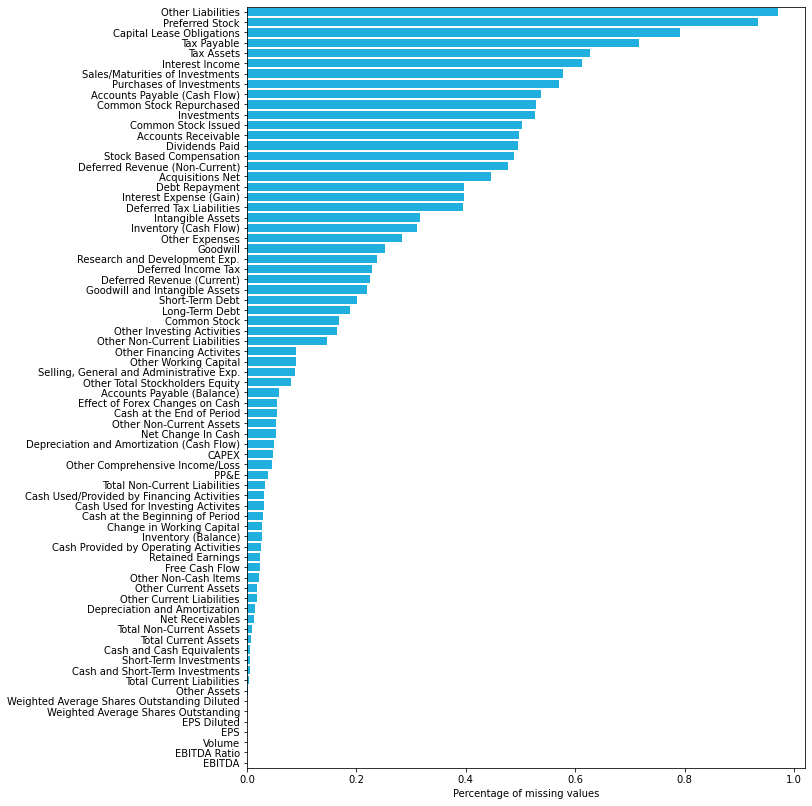

In [25]:
plt.rcParams['figure.figsize'] = [10, 14]

missing_percentage_by_column_reconstructed_df = missing_percentage_by_column_reconstructed_df.sort_values(by="Percentage of missing values", ascending=False)[missing_percentage_by_column_reconstructed_df["Percentage of missing values"] > 0]

sns.barplot(data=missing_percentage_by_column_reconstructed_df, x="Percentage of missing values", y=missing_percentage_by_column_reconstructed_df.index, color="deepskyblue")

C:\Users\juani\AppData\Local\Temp/ipykernel_22148/1628190352.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_percentage_by_column_reconstructed_trivial_df = missing_percentage_by_column_reconstructed_trivial_df.sort_values(by="Percentage of missing values", ascending=False)[missing_percentage_by_column_reconstructed_trivial_df["Percentage of missing values"] > 0]


<AxesSubplot:xlabel='Percentage of missing values'>

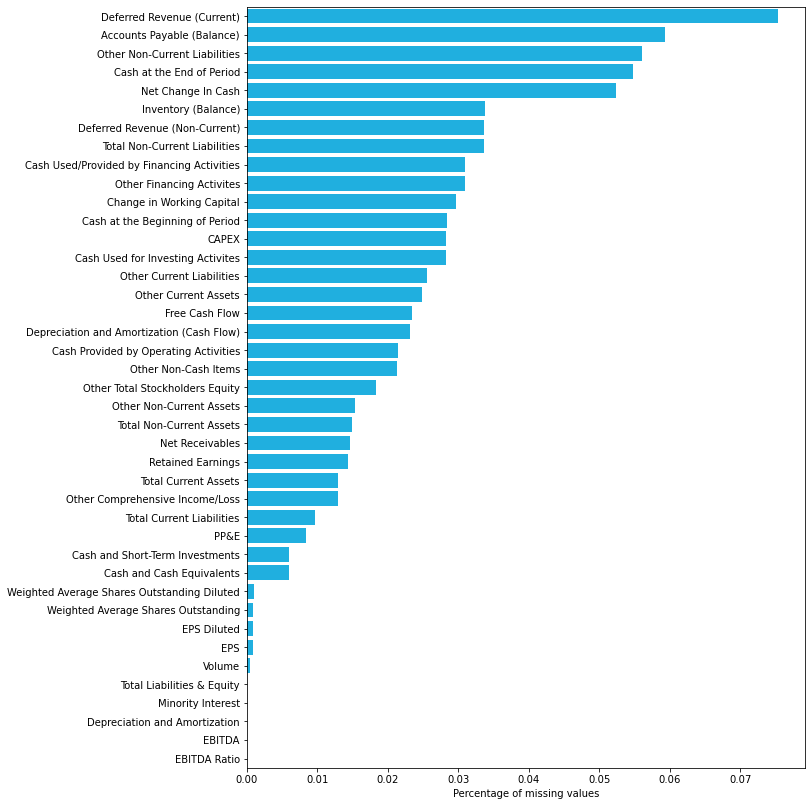

In [26]:
plt.rcParams['figure.figsize'] = [10, 14]

missing_percentage_by_column_reconstructed_trivial_df = missing_percentage_by_column_reconstructed_trivial_df.sort_values(by="Percentage of missing values", ascending=False)[missing_percentage_by_column_reconstructed_trivial_df["Percentage of missing values"] > 0]

sns.barplot(data=missing_percentage_by_column_reconstructed_trivial_df, x="Percentage of missing values", y=missing_percentage_by_column_reconstructed_trivial_df.index, color="deepskyblue")

## Añadiendo el market cap

In [27]:
# Agregamos al dataframe la capitalización de mercado
basic_data["Market Cap"] = basic_data["Ticker"].apply(lambda x: get_market_cap(x))

## Eliminación manual de los datos

In [28]:
missing_percentages = basic_data[["Ticker", 'NR - Percentage Missing',
       'NR - Percentage Missing (Only Core)', 'R - Percentage Missing',
       'R - Percentage Missing (Only Core)',
       'R - Percentage Missing (Trivial Fix)',
       'R - Percentage Missing (Only Core) (Trivial Fix)']].copy()

In [29]:
# Comprobamos que todas las acciones tienen los datos core
missing_percentages[ missing_percentages["R - Percentage Missing (Only Core) (Trivial Fix)"] > 0]

,Ticker,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix)


In [30]:
missing_percentages["R - Percentage Missing (Trivial Fix)"].quantile(0.99)

0.07693776520509159

In [31]:
missing_percentages[missing_percentages["R - Percentage Missing (Trivial Fix)"] > missing_percentages["R - Percentage Missing (Trivial Fix)"].quantile(0.99)].sort_values(by=["R - Percentage Missing (Trivial Fix)"], ascending=False)

,Ticker,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix)
1091,FCRD,0.469048,0.281250,NaN,NaN,0.138614,0.0
3039,UMH,0.322969,0.154412,0.465347,0.0,0.132673,0.0
3171,WCFB,0.422222,0.187500,NaN,NaN,0.128713,0.0
1107,FGF,0.397619,0.234375,NaN,NaN,0.118812,0.0
14,ABCP,0.431933,0.154412,0.374257,0.0,0.115842,0.0
2423,RAND,0.386447,0.125000,0.322772,0.0,0.108416,0.0
177,ANAT,0.512999,0.422297,NaN,NaN,0.105611,0.0
1857,MFC,0.325267,0.250000,NaN,NaN,0.104575,0.0
2659,SLF,0.317324,0.250000,NaN,NaN,0.104167,0.0
2187,OPHC,0.399499,0.197368,NaN,NaN,0.101710,0.0


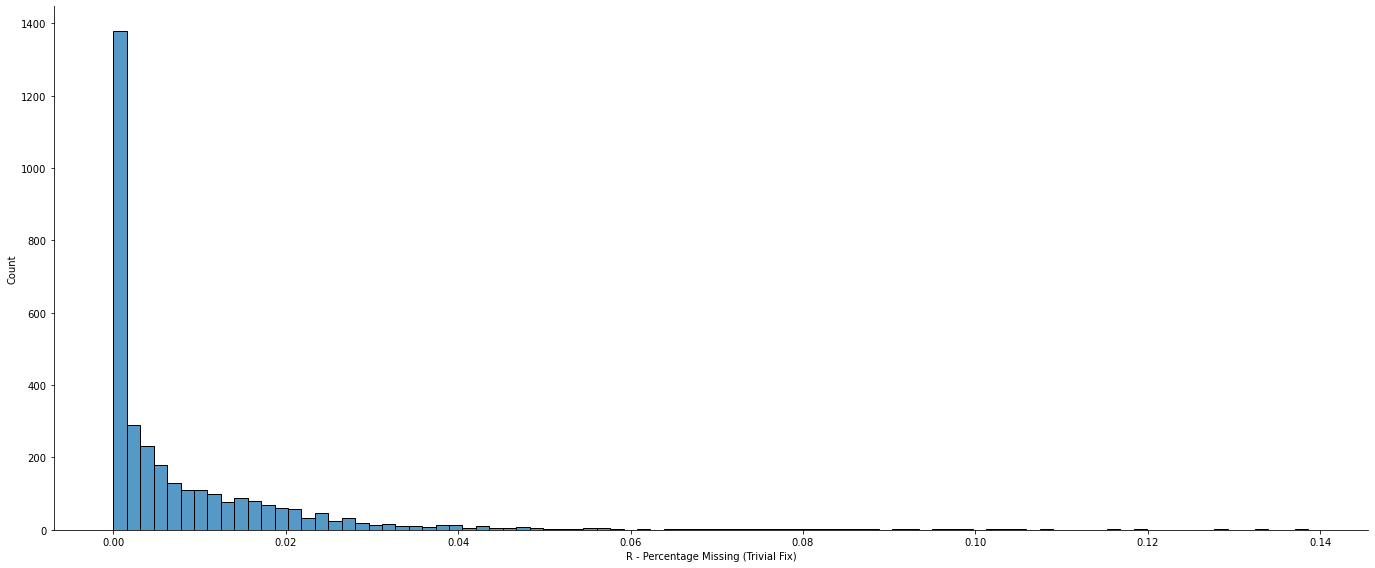

In [32]:
sns.displot(missing_percentages["R - Percentage Missing (Trivial Fix)"], height=8, aspect=12/5)

In [33]:
missing_percentages

,Ticker,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix)
0,A,0.173913,0.000000,0.133018,0.0,0.003013,0.0
1,AA,0.217989,0.166667,0.099010,0.0,0.004950,0.0
2,AACG,0.206873,0.008929,0.170437,0.0,0.010558,0.0
3,AAL,0.168627,0.036765,0.087459,0.0,0.000000,0.0
4,AAOI,0.149206,0.013889,0.113861,0.0,0.000000,0.0
...,...,...,...,...,...,...,...
3303,ZUO,0.150476,0.000000,0.116832,0.0,0.000000,0.0
3304,ZWS,0.160952,0.000000,0.107921,0.0,0.000000,0.0
3305,ZYME,0.184906,0.100000,0.113725,0.0,0.000000,0.0
3306,ZYXI,0.240741,0.013889,0.179455,0.0,0.007426,0.0


In [34]:
missing_percentages.describe()

,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix)
count,3308.000000,3308.000000,3239.000000,3239.0,3308.000000,3308.0
mean,0.234510,0.055347,0.151434,0.0,0.008492,0.0
std,0.067311,0.074835,0.043843,0.0,0.014176,0.0
min,0.063465,0.000000,0.048128,0.0,0.000000,0.0
25%,0.186293,0.000000,0.121305,0.0,0.000000,0.0
50%,0.226493,0.016892,0.146611,0.0,0.003046,0.0
75%,0.274211,0.093750,0.176823,0.0,0.011618,0.0
max,0.572487,0.483871,0.465347,0.0,0.138614,0.0


# Otros ajustes

### Eliminamos las entradas que incoherentes


In [35]:
# Aquellas con capitalización de mercado negativa
basic_data.drop(basic_data[basic_data["Market Cap"] <= 0].index, inplace=True)

In [36]:
# Aquellas sin capitalización de mercado
basic_data.drop(basic_data[basic_data["Market Cap"].isna()].index, inplace=True)

In [37]:
# Aquellas con Insider Percentage que no esté entre 0 y 1
basic_data.drop(basic_data[(basic_data["Insider Percentage"] > 1) | (basic_data["Insider Percentage"] < 0)].index, inplace=True)

In [38]:
# Aquellas con Institution Percentage que no esté entre 0 y 1
basic_data.drop(basic_data[(basic_data["Institution Percentage"] > 1) | (basic_data["Institution Percentage"] < 0)].index, inplace=True)

In [39]:
basic_data.describe()


,Insider Percentage,Institution Percentage,Years since IPO,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix),Market Cap
count,2838.000000,2910.000000,3025.000000,3025.000000,3025.000000,2959.000000,2959.0,3025.000000,3025.0,3.025000e+03
mean,0.150998,0.590333,23.109752,0.236844,0.057244,0.152749,0.0,0.008729,0.0,1.799129e+10
std,0.208132,0.325781,17.060346,0.067884,0.075572,0.044159,0.0,0.014299,0.0,9.291082e+10
min,0.000000,0.000000,0.000000,0.063465,0.000000,0.048128,0.0,0.000000,0.0,3.912982e+04
25%,0.012000,0.292350,10.000000,0.188254,0.000000,0.122662,0.0,0.000000,0.0,2.138172e+08
50%,0.053550,0.690550,21.000000,0.229048,0.019231,0.147491,0.0,0.003300,0.0,1.530016e+09
75%,0.204575,0.882775,30.000000,0.277193,0.095588,0.178218,0.0,0.012023,0.0,8.749620e+09
max,0.986500,0.999800,152.000000,0.572487,0.483871,0.465347,0.0,0.138614,0.0,2.317218e+12


In [40]:
# Hacemos el ticker el nuevo índice para poder referenciar las entradas por el ticker de la empresa
basic_data.set_index("Ticker", inplace=True)

In [41]:
# Añadimos algunas columnas extras
for index, row in basic_data.iterrows():
    ticker = index

    # Abrimos los fundamentales con el precio
    fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)

    # Añadimos la columna de rentabilidad 
    basic_data.loc[ticker,"CAGR"] = (fundamental_data.loc[fundamental_data.index[-1],"Adj Close"] / fundamental_data.loc[fundamental_data.index[0],"Adj Close"]) ** (1/(fundamental_data.index[-1]-fundamental_data.index[0])) - 1
    basic_data.loc[ticker,"CAGR with divs"] = (fundamental_data.loc[fundamental_data.index[-1],"Price with cum Dividends"] / fundamental_data.loc[fundamental_data.index[0],"Adj Close"]) ** (1/(fundamental_data.index[-1]-fundamental_data.index[0])) - 1

    # Añadimos una columna que nos indique el número de años en los datos
    basic_data.loc[ticker,"Years"] = datetime.now().year - fundamental_data.index[0]


C:\Users\juani\AppData\Local\Temp/ipykernel_22148/3619067371.py:9: RuntimeWarning: invalid value encountered in double_scalars
  basic_data.loc[ticker,"CAGR"] = (fundamental_data.loc[fundamental_data.index[-1],"Adj Close"] / fundamental_data.loc[fundamental_data.index[0],"Adj Close"]) ** (1/(fundamental_data.index[-1]-fundamental_data.index[0])) - 1
C:\Users\juani\AppData\Local\Temp/ipykernel_22148/3619067371.py:10: RuntimeWarning: invalid value encountered in double_scalars
  basic_data.loc[ticker,"CAGR with divs"] = (fundamental_data.loc[fundamental_data.index[-1],"Price with cum Dividends"] / fundamental_data.loc[fundamental_data.index[0],"Adj Close"]) ** (1/(fundamental_data.index[-1]-fundamental_data.index[0])) - 1
C:\Users\juani\AppData\Local\Temp/ipykernel_22148/3619067371.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  basic_data.loc[ticker,"CAGR"] = (fundamental_data.loc[fundamental_data.index[-1],"Adj Close"] / fundamental_data.loc[fundamental_data.index[

In [42]:
basic_data["Difference CAGR"] = basic_data["CAGR with divs"] - basic_data["CAGR"]

In [43]:
basic_data.drop(basic_data[basic_data["CAGR"] == np.inf].index, inplace=True)


In [44]:

basic_data.drop(["FZMD"], inplace=True)

In [45]:
basic_data[["CAGR", "CAGR with divs","Difference CAGR"]].describe()

,CAGR,CAGR with divs,Difference CAGR
count,3018.000000,3018.000000,3018.000000
mean,0.049135,0.065258,0.016123
std,0.195426,0.195971,0.034096
min,-0.814007,-0.814007,0.000000
25%,-0.024871,-0.003613,0.000000
50%,0.070197,0.086735,0.003191
75%,0.133716,0.149160,0.017529
max,2.972027,2.972027,0.489939


In [46]:
basic_data["Difference CAGR"].sort_values(ascending=False)


Ticker
MIC      0.489939
GYRO     0.409374
NOVC     0.394161
FCIC     0.309858
EMITF    0.296464
           ...   
IRDM     0.000000
ZZLL     0.000000
AIV           NaN
ITRN          NaN
VHI           NaN
Name: Difference CAGR, Length: 3021, dtype: float64

In [47]:
basic_data["CAGR"].sort_values(ascending=False).head(10)

Ticker
HRBR    2.972027
MRNA    1.520392
CXKJ    1.073506
FRHC    1.055133
SE      1.049288
ACMR    0.965690
TTD     0.952188
ARGX    0.926046
BILI    0.925609
ZS      0.844358
Name: CAGR, dtype: float64

### Fechas incorrectas de IPO
Parece que los datos sobre las salido a bolsa que hemos recolectado no son del todo correctos pues por otro lado hemos encontrado datos fundamentales y precios de cotización anteriores a la salida (lo cual no parece
tener sentido). Manualmente hemos observado casos como el de ACN (Accenture) que salio a la bolsa antes de lo que indicaban los datos recolectados en la columna "IPO". Vamos entonces a quedarnos con la fecha más antigua entre la indicada en la columna de "IPO" y la fecha implítica según los datos fundamentales y de precio recopilados.

In [48]:
# Fill missing "years since Ipo" values with "years" values
basic_data["Years since IPO"].fillna(basic_data["Years"], inplace=True)

# Cogemos los valores más grandes entre ambas columnas para la los años desde la IPO
wrong_IPO_date = basic_data[basic_data["Years since IPO"] < basic_data["Years"]]
basic_data.loc[wrong_IPO_date.index, "Years since IPO"] = basic_data.loc[wrong_IPO_date.index, "Years"]
basic_data[basic_data["Years since IPO"] < basic_data["Years"]]

,Name,Currency,Sector,Industry,Country,IPO,Insider Percentage,Institution Percentage,Years since IPO,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix),Market Cap,CAGR,CAGR with divs,Years,Difference CAGR
Ticker,,,,,,,,,,,,,,,,,,,,


In [49]:
numerical_columns = basic_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Insider Percentage', 'Institution Percentage', 'Years since IPO',
       'NR - Percentage Missing', 'NR - Percentage Missing (Only Core)',
       'R - Percentage Missing', 'R - Percentage Missing (Only Core)',
       'R - Percentage Missing (Trivial Fix)',
       'R - Percentage Missing (Only Core) (Trivial Fix)', 'Market Cap',
       'CAGR', 'CAGR with divs', 'Years', 'Difference CAGR'],
      dtype='object')

<AxesSubplot:xlabel='CAGR with divs', ylabel='Count'>

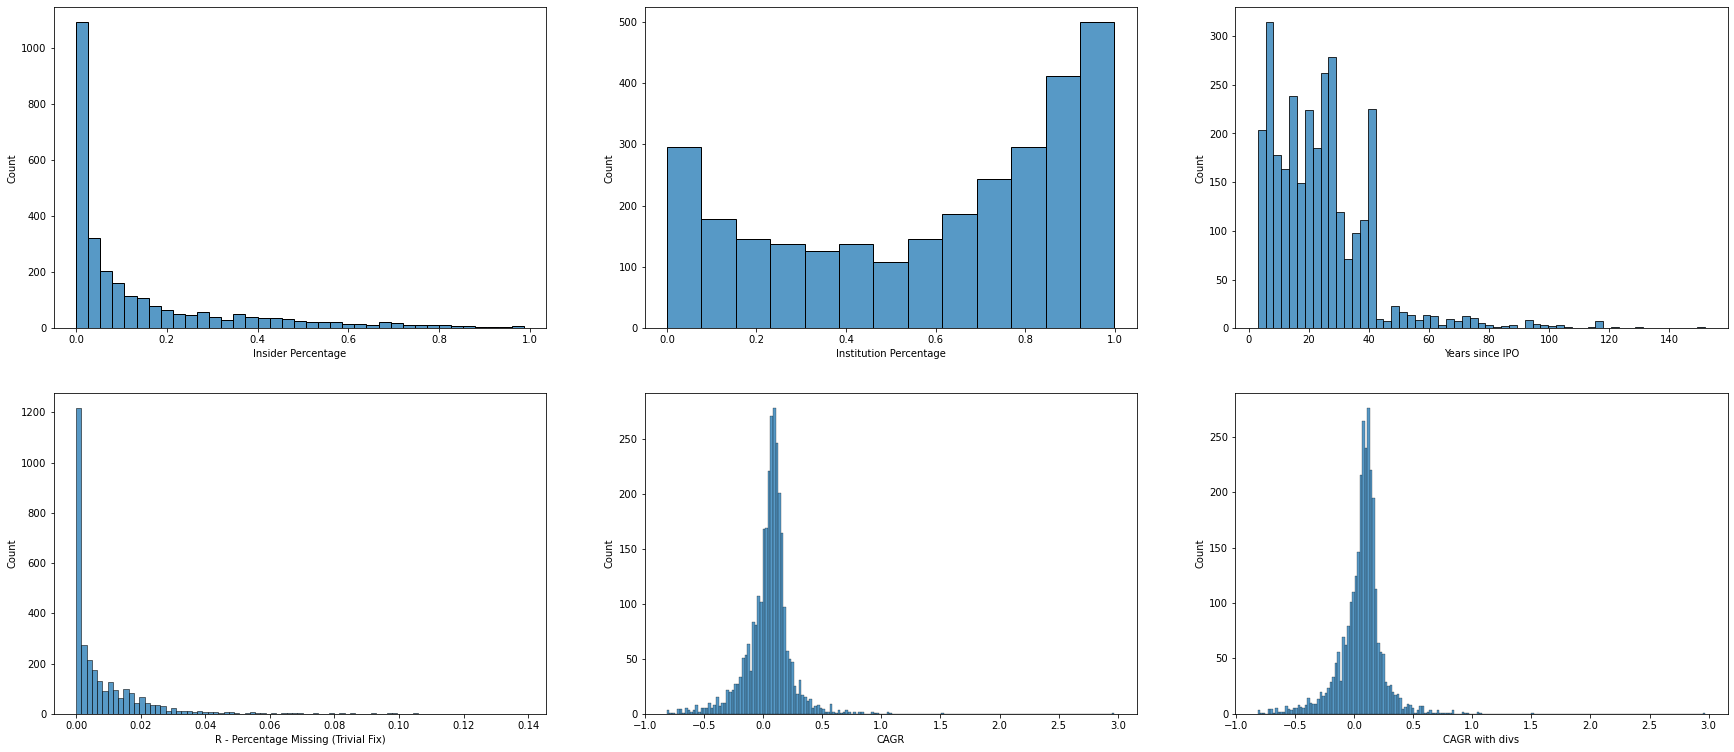

In [50]:
columns_to_graph = ["Insider Percentage", "Institution Percentage", "Years since IPO", "R - Percentage Missing (Trivial Fix)", "CAGR", "CAGR with divs"]

fig, axes = plt.subplots(2, 3, figsize=(30,13))

sns.histplot(ax=axes[0,0], data=basic_data[columns_to_graph[0]])
sns.histplot(ax=axes[0,1], data=basic_data[columns_to_graph[1]])
sns.histplot(ax=axes[0,2], data=basic_data[columns_to_graph[2]])
sns.histplot(ax=axes[1,0], data=basic_data[columns_to_graph[3]])
sns.histplot(ax=axes[1,1], data=basic_data[columns_to_graph[4]])
sns.histplot(ax=axes[1,2], data=basic_data[columns_to_graph[5]])

<AxesSubplot:ylabel='Count'>

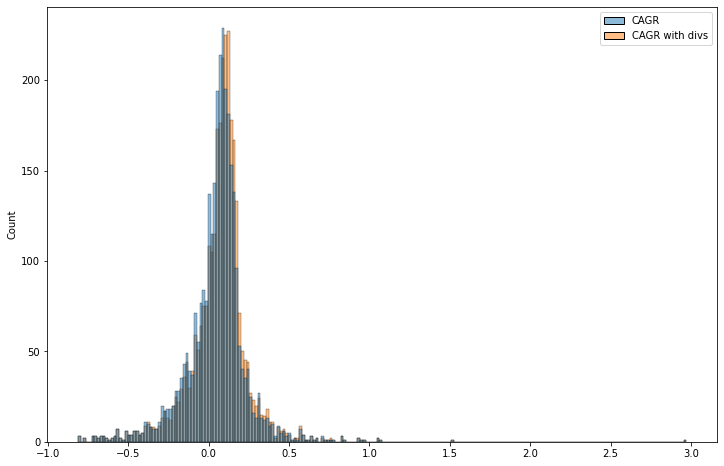

In [51]:
# Vemos la distribucción de rentabilidades de manera más ampliada
plt.rcParams["figure.figsize"]=12,8
sns.histplot(data=basic_data[["CAGR", "CAGR with divs"]])


In [52]:
basic_data[["CAGR", "CAGR with divs"]].describe()

,CAGR,CAGR with divs
count,3018.000000,3018.000000
mean,0.049135,0.065258
std,0.195426,0.195971
min,-0.814007,-0.814007
25%,-0.024871,-0.003613
50%,0.070197,0.086735
75%,0.133716,0.149160
max,2.972027,2.972027


In [53]:
# # Discretizamos Years since IPO en 3 categorías
# basic_data["Madurez"] = pd.cut(basic_data["Years since IPO"], [0,3,10,basic_data["Years since IPO"].max()], labels=["Jóven", "Medio", "Maduro"]).to_frame()

# # Discretizamos Market Cap en 3 categorías
# basic_data["Tamaño"] = pd.cut(basic_data["Market Cap"],  [0,2000000000,10000000000,basic_data["Market Cap"].max()], labels=["Pequeña", "Mediana", "Grande"]).to_frame()

# # Discretizamos CAGR en 3 categorías
# basic_data["Rentabilidad"] = pd.cut(basic_data["CAGR"],  basic_data["CAGR"].quantile([0,0.20,0.4,0.6,0.8,1]), labels=["Muy Mala", "Mala", "Normal", "Buena", "Muy Buena"]).to_frame()

# # Discretizamos CAGR en 3 categorías
# basic_data["Rentabilidad with divs"] = pd.cut(basic_data["CAGR with divs"],  basic_data["CAGR with divs"].quantile([0,0.20,0.4,0.6,0.8,1]), labels=["Muy Mala", "Mala", "Normal", "Buena", "Muy Buena"]).to_frame()



In [54]:
# basic_data[["Insider Percentage","Institution Percentage"]].describe()

In [55]:
# # Discretizamos insider percentage en 3 categorías
# basic_data["Insider Ownership"] = pd.cut(basic_data["Insider Percentage"], basic_data["Insider Percentage"].quantile([0,0.33,0.66,1]), labels=["Baja", "Media", "Alta"],duplicates="drop").to_frame()

# # Discretizamos institutional percentage en 3 categorías
# basic_data["Institutional Ownership"] = pd.cut(basic_data["Institution Percentage"], basic_data["Institution Percentage"].quantile([0,0.33,0.66,1]), labels=["Baja", "Media", "Alta"], duplicates="drop").to_frame()

In [56]:
# Eliminamos las columnas que no nos interesan
basic_data.drop(["IPO"], axis=1, inplace=True)

In [57]:
basic_data

,Name,Currency,Sector,Industry,Country,Insider Percentage,Institution Percentage,Years since IPO,NR - Percentage Missing,NR - Percentage Missing (Only Core),R - Percentage Missing,R - Percentage Missing (Only Core),R - Percentage Missing (Trivial Fix),R - Percentage Missing (Only Core) (Trivial Fix),Market Cap,CAGR,CAGR with divs,Years,Difference CAGR
Ticker,,,,,,,,,,,,,,,,,,,
A,"AGILENT TECHNOLOGIES, INC.",USD,Healthcare,Diagnostics & Research,US,0.0024,0.9126,23,0.173913,0.000000,0.133018,0.0,0.003013,0.0,4.528688e+10,0.065679,0.067759,23.0,0.002080
AA,ALCOA CORPORATION,USD,Basic Materials,Aluminum,US,0.0087,0.8436,8,0.217989,0.166667,0.099010,0.0,0.004950,0.0,7.401581e+09,0.015177,0.018720,8.0,0.003543
AACG,ATA CREATIVITY GLOBAL,USD,Consumer Defensive,Education & Training Services,CN,0.0553,0.1709,14,0.206873,0.008929,0.170437,0.0,0.010558,0.0,8.456380e+07,0.294082,0.478690,14.0,0.184609
AAL,AMERICAN AIRLINES GROUP INC.,USD,Industrials,Airlines,US,0.0108,0.5432,13,0.168627,0.036765,0.087459,0.0,0.000000,0.0,9.895510e+09,0.171994,0.182450,13.0,0.010456
AAOI,"APPLIED OPTOELECTRONICS, INC.",USD,Technology,Semiconductors,US,0.0712,0.5119,9,0.149206,0.013889,0.113861,0.0,0.000000,0.0,2.069533e+08,-0.125239,-0.125239,8.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,ZOETIS INC.,USD,Healthcare,Drug Manufacturers—Specialty & Generic,US,0.0024,0.9288,9,0.148148,0.125000,0.070407,0.0,0.000000,0.0,9.015518e+10,0.260344,0.264165,9.0,0.003821
ZUO,"ZUORA, INC.",USD,Technology,Software—Infrastructure,US,0.0089,0.7699,4,0.150476,0.000000,0.116832,0.0,0.000000,0.0,1.975496e+09,-0.084538,-0.084538,4.0,0.000000
ZYME,ZYMEWORKS INC.,USD,Healthcare,Biotechnology,CA,0.0069,0.7926,5,0.184906,0.100000,0.113725,0.0,0.000000,0.0,1.603927e+09,0.397348,0.397348,5.0,0.000000


In [58]:
basic_data.loc["FB", :]

Name                                                          META PLATFORMS, INC.
Currency                                                                       USD
Sector                                                      Communication Services
Industry                                            Internet Content & Information
Country                                                                         US
Insider Percentage                                                          0.0053
Institution Percentage                                                      0.7914
Years since IPO                                                                 10
NR - Percentage Missing                                                   0.151429
NR - Percentage Missing (Only Core)                                            0.0
R - Percentage Missing                                                    0.125743
R - Percentage Missing (Only Core)                                             0.0
R - 

In [60]:
basic_data.to_csv("Basic_information_cleaned3.csv")

# Extra repairs


In [62]:
# En 2010 y 2015 hay más acciones normales que diluted
# Lo solucionamos asumiendo que las acciones diluted son iguales a las normales
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\BYDDF.csv", index_col=0)

fundamental_data.loc[2010, "Weighted Average Shares Outstanding Diluted"] = fundamental_data.loc[2010, "Weighted Average Shares Outstanding"]
fundamental_data.loc[2015, "Weighted Average Shares Outstanding Diluted"] = fundamental_data.loc[2015, "Weighted Average Shares Outstanding"]

# En consecuencia también cambios el valor de los beneficios diluidos
fundamental_data.loc[2010, "EPS Diluted"] = fundamental_data.loc[2010, "EPS"]
fundamental_data.loc[2015, "EPS Diluted"] = fundamental_data.loc[2015, "EPS"]

fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\BYDDF.csv")

In [63]:

fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\CWCO.csv", index_col=0)

fundamental_data.drop(2021, axis=0, inplace=True)

fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\CWCO.csv")

In [64]:

ticker = "GLP"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2005, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [65]:

ticker = "AMPY"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2021, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [66]:

ticker = "FAT"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2021, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [67]:

ticker = "LOCO"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2021, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [68]:

ticker = "SOHO"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2004,2021], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [69]:

ticker = "CPIX"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2021, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [70]:

ticker = "CAPC"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2021, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [71]:

ticker = "IPDN"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2021, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [72]:

ticker = "NTAP"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2009, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [73]:

ticker = "CORR"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2011, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [74]:

ticker = "Y"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2008,2009,2010], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [75]:

ticker = "SNFCA"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2006,2010,2011], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [76]:

ticker = "GHL"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2004,2005,2006,2007], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [77]:

ticker = "MHLD"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2009,2010], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [78]:

ticker = "KINS"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2019, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [79]:

ticker = "DGICB"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2007,2008,2009,2010,2011], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [80]:

ticker = "FMBM"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2008,2009,2010,2011,2012], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [81]:

ticker = "RUTH"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2005,2007], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [82]:

ticker = "FNHC"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2005, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [83]:

ticker = "GBOX"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2021, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [84]:

ticker = "BBGI"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2021, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [85]:

ticker = "ICCH"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2020,2021], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [86]:

ticker = "GSL"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2016, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [87]:

ticker = "HWKN"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2002,2003,2004,2005,2006,2007,2008], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [88]:

ticker = "EVK"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2008,2009,2010,2011,2012,2013,2014], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [89]:

ticker = "JOUT"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2006,2007,2008], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [90]:

ticker = "GGB"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([1999,2000,2001], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [91]:

ticker = "SYNL"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2004,2007,2009], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [92]:

ticker = "SYNL"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2012, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [93]:

ticker = "JAN"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2004, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [96]:

ticker = "WINA"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2002,2003,2004,2006,2007,2008,2009,2010], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

KeyError: '[2002, 2003, 2004, 2006, 2007, 2008, 2009, 2010] not found in axis'

In [97]:

ticker = "CX"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2012, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [98]:

ticker = "CPSH"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2006,2007,2010,2012], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [99]:

ticker = "LNC"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2002,2003,2004,2005], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [100]:

ticker = "MAC"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2013, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [101]:

ticker = "AIZ"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2004, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [102]:

ticker = "JNCE"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2021, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [103]:

ticker = "UONEK"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2002,2003], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [104]:

ticker = "ENIA"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2008], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [105]:

ticker = "TAL"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2011,2012,2013], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [106]:

ticker = "BIO-B"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2019, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [107]:

ticker = "DY"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2002,2003], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [108]:

ticker = "CAAS"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop([2005,2006,2007,2008,2009,2010], axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")

In [109]:

ticker = "COHN"
fundamental_data = pd.read_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv", index_col=0)
fundamental_data.drop(2021, axis=0, inplace=True)


fundamental_data.to_csv("CleanedFundamentalsNormal&TrivialFix\\"+ticker+".csv")